### Taller 10 - Nube de Palabras 

##### Realice una nube de palabra sobre cualquier corpus.

### Importar Librerías

In [1]:
import numpy as np
import pandas as pd
import re 
from wordcloud import WordCloud, ImageColorGenerator

from nltk.corpus import stopwords
stopwords = stopwords.words("spanish")

import matplotlib.pyplot as plt
import PIL.Image
from IPython.display import display

### Cargar Data

In [2]:
data = pd.read_excel('C:/Users/user/Documents/ESPECIALIZACION/LNP/Archivos/Cuentos.xlsx', sheet_name='cuentos')
print(f"Tenemos {data.shape[0]} registros.")
data

Tenemos 10 registros.


,ID,TITULO,RONDA
0,1,Mambrú se fue a la guerra,"Mambrú se fue a la guerra, ¡qué dolor, qué dol..."
1,2,Arroz con leche,Me quiero casar con una viudita de la capital....
2,3,"Sal de ahí, chivita","Sal de ahí, chivita, sal de ese agujero. Sal d..."
3,4,En un bosque de la China,"En un bosque de la china la chinita se perdió,..."
4,5,La vaca Lola,¿Y cómo hace la vaca? Muuuuu… Muuuuu… Muuuuu… ...
5,6,Chuchuwá,"Chuchuwá -¡Atención! +¡Sí, señor! -¡Todos marc..."
6,7,Toño retoño mató a su mujer,"Toño retoño mató a su mujer, con un cuchillito..."
7,8,Federico ha matado a su mujer,"Don Federico mató a su mujer,\n la hi..."
8,9,Sammy el heladero,Sammy el heladero Es un pingüino feliz y gordi...
9,10,Yo tenía 10 perritos,"Yo tenía diez perritos, yo tenía diez perritos..."


### Pre-procesamiento

In [3]:
stopwords.extend(["muuuuu", "chuchuwá", "ah", "wa", "ahí", "mu", "ñam", "vaca", "lola", "mambrú", "bis", "Sammy", "Federico", "perritos", "helado", "heladero", "sal", "chivita", "china", "chinita"])

def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = [palabra for palabra in texto.split() if palabra not in stopwords]
    texto = " ".join(texto)
    return texto

data['PRE_PROCESADO'] = data.RONDA.apply(lambda texto: pre_procesado(texto))

data.head(10)

,ID,TITULO,RONDA,PRE_PROCESADO
0,1,Mambrú se fue a la guerra,"Mambrú se fue a la guerra, ¡qué dolor, qué dol...",guerra dolor dolor pena guerra sé cuándo vendr...
1,2,Arroz con leche,Me quiero casar con una viudita de la capital....,quiero casar viudita capital sepa coser sepa b...
2,3,"Sal de ahí, chivita","Sal de ahí, chivita, sal de ese agujero. Sal d...",agujero agujero vamos buscar lobo saque chiva ...
3,4,En un bosque de la China,"En un bosque de la china la chinita se perdió,...",bosque perdió andaba perdido encontramos dos b...
4,5,La vaca Lola,¿Y cómo hace la vaca? Muuuuu… Muuuuu… Muuuuu… ...,cómo hace cabeza cola cabeza cola hace cabeza ...
5,6,Chuchuwá,"Chuchuwá -¡Atención! +¡Sí, señor! -¡Todos marc...",atención señor marchando listo dos tres cua do...
6,7,Toño retoño mató a su mujer,"Toño retoño mató a su mujer, con un cuchillito...",toño retoño mató mujer cuchillito grande saco ...
7,8,Federico ha matado a su mujer,"Don Federico mató a su mujer,\n la hi...",don federico mató mujer hizo picadillo pasó sa...
8,9,Sammy el heladero,Sammy el heladero Es un pingüino feliz y gordi...,sammy pingüino feliz gordito vive patria hielo...
9,10,Yo tenía 10 perritos,"Yo tenía diez perritos, yo tenía diez perritos...",diez diez perdió nieve quedan nueve nueve qued...


### Nube de palabras

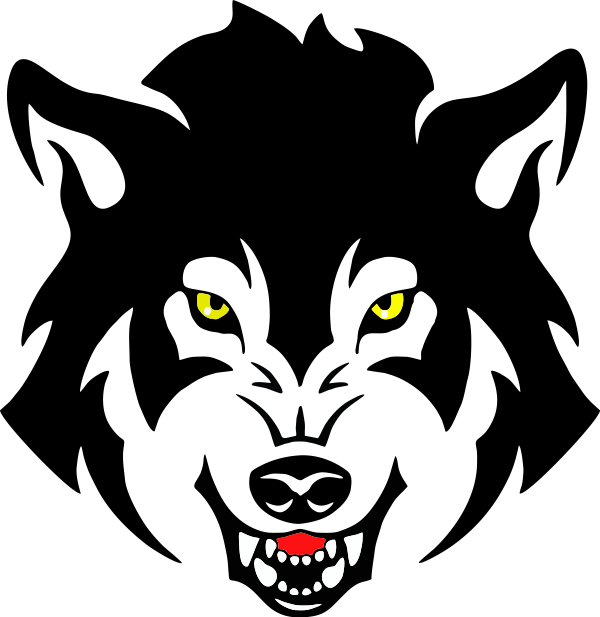

In [4]:
img = PIL.Image.open("C:/Users/user/Documents/ESPECIALIZACION/LNP/Archivos/Lobo.png")
display(img)

In [5]:
mask = np.array(img)

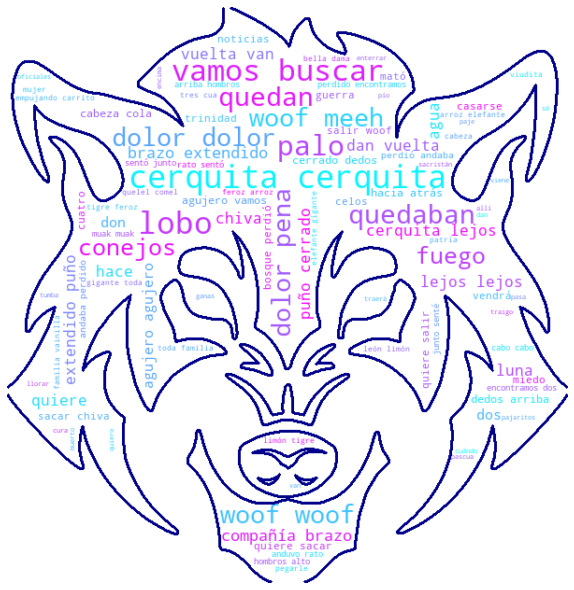

In [6]:
palabras = data.PRE_PROCESADO.str.cat(sep=" ")
wordcloud = WordCloud(width=800, height=400,
                      max_font_size=150, max_words=100,
                      background_color="white", colormap="cool",
                      stopwords=stopwords, collocations=True,
                      mask=mask, contour_width=1.5, contour_color='darkblue').generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

wordcloud.to_file("nlp_Lobo.png")

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

#### Elaborado por: Sandra Karina Osorio - G 51